# IMPORTING THE NECCESSARY LIBRARIES

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Loading the Data Set 

In [26]:
data=pd.read_csv('/Users/vagalaganiupender/Desktop/Data Analyst/Heart_Failure_Details.csv')

# Remove the "S.No" column
data = data.drop("S no.", axis=1)
data

,age,anaemia,creatinine phosphokinase,diabetes,ejection fraction,high bp,platelets,serum creatinine,sex,smoking,death
0,75.0,0,582,0,20,1,265000.00,1.9,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,1,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,0,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,0,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,1,1,0


# Checking the Null Values in the Dataset

In [27]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine phosphokinase    0
diabetes                    0
ejection fraction           0
high bp                     0
platelets                   0
serum creatinine            0
sex                         0
smoking                     0
death                       0
dtype: int64

# Data pre processing

In [28]:
categorical_cols = []
numerical_cols = []

for col in data.columns:
    if data[col].dtype == 'object' or data[col].nunique() < 10:
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

print('Categorical columns:', categorical_cols) #determining the type of variables
print('Continuous columns:', numerical_cols)

Categorical columns: ['anaemia', 'diabetes', 'high bp', 'sex', 'smoking', 'death']
Continuous columns: ['age', 'creatinine phosphokinase', 'ejection fraction', 'platelets', 'serum creatinine']


# finding any outliers in the data set

Outliers:
      age  anaemia  creatinine phosphokinase  diabetes  ejection fraction  \
1    55.0        0                      7861         0                 38   
9    80.0        1                       123         0                 35   
28   58.0        1                        60         0                 38   
52   60.0        0                      3964         1                 62   
60   45.0        0                      7702         1                 25   
64   45.0        0                       582         0                 80   
72   85.0        0                      5882         0                 35   
103  42.0        0                      5209         0                 30   
105  72.0        1                       328         0                 30   
109  45.0        0                       292         1                 35   
131  60.0        1                      1082         1                 45   
134  81.0        0                      4540         0            

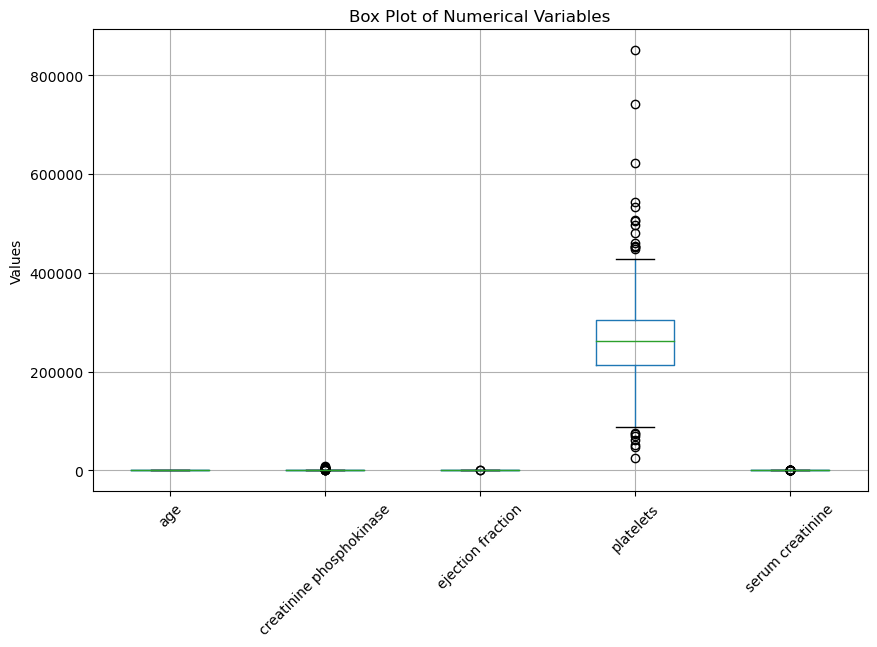

In [29]:
# Detect outliers using Z-score
z_scores = np.abs((data[numerical_cols] - data[numerical_cols].mean()) / data[numerical_cols].std())
outlier_threshold = 3  # Adjust as per your preference

outliers = data[(z_scores > outlier_threshold).any(axis=1)]

# Display the outliers
print("Outliers:")
print(outliers)

# Visualize outliers using box plots
plt.figure(figsize=(10, 6))
data[numerical_cols].boxplot()
plt.title("Box Plot of Numerical Variables")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [30]:
# convert the 'sex' column from integer to categorical
data['sex'] = data['sex'].astype('category')

# Exploratory Data Analysis (EDA)

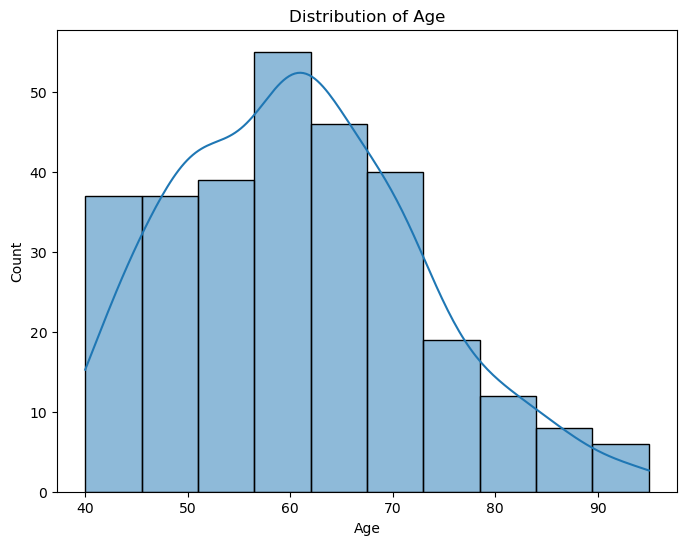

In [31]:
# plot the distribution of the 'age' variable
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

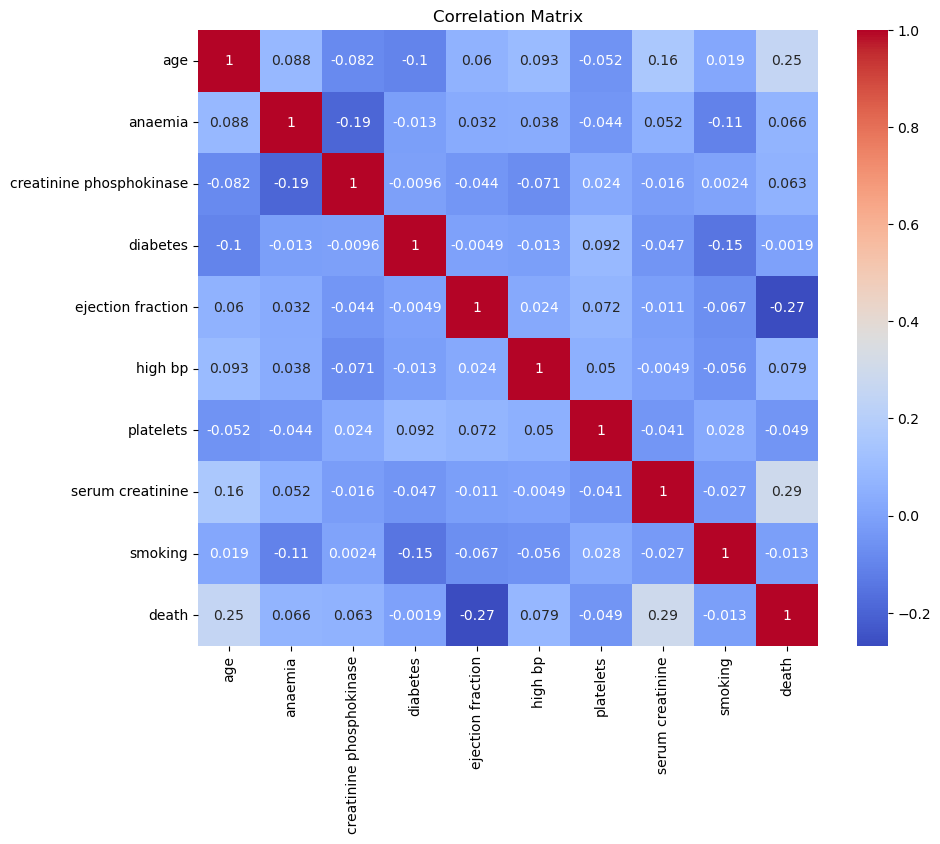

In [32]:
# Correlation analysis
correlation_matrix = data.corr()  # Compute the correlation matrix
# Example: visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [43]:
#compute the correlation between each feature and the target variable ('heart_failure')
correlation = data.corr()['death'].sort_values(ascending=False)[1:6].reset_index()
print(correlation)

                      index     death
0          serum creatinine  0.294278
1                       age  0.253729
2                   high bp  0.079351
3                   anaemia  0.066270
4  creatinine phosphokinase  0.062728


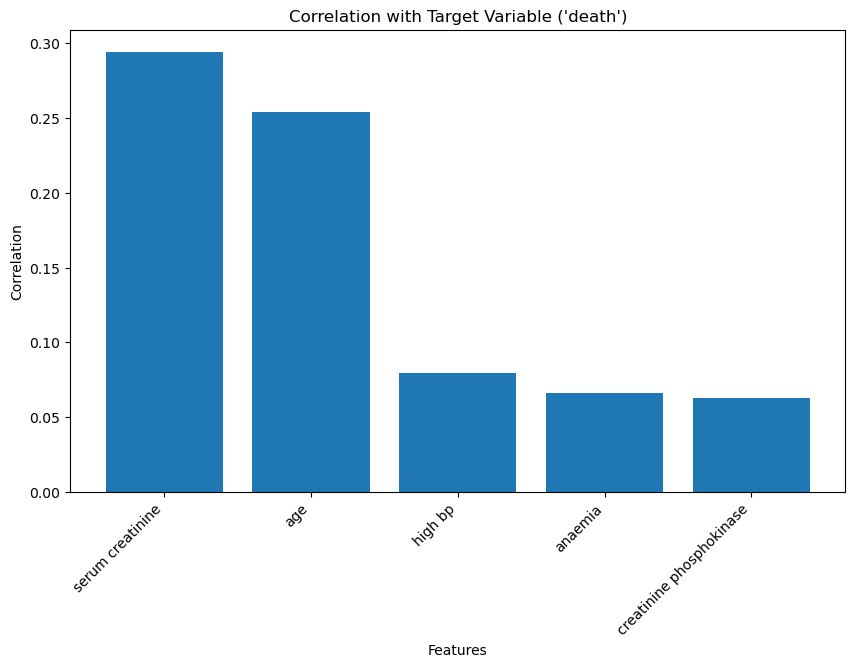

In [47]:
# Plot the correlation
plt.figure(figsize=(10, 6))
plt.bar(correlation['index'], correlation['death'])
plt.title("Correlation with Target Variable ('death')")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the computed correlation values between each feature and the target variable ('death'), the top 5 features that have an effect on the likelihood of death in the heart failure dataset are as follows:

1.Serum Creatinine: This feature has a correlation coefficient of 0.294278 with death. Higher levels of serum creatinine are associated with an increased risk of death.

2.Age: Age shows a correlation coefficient of 0.253729 with death. As age increases, the likelihood of death also tends to increase.

3.High Blood Pressure (Hypertension): This feature has a correlation coefficient of 0.079351 with death. The presence of high blood pressure can contribute to an elevated risk of death.

4.Anemia: Anemia shows a correlation coefficient of 0.066270 with death. The presence of anemia may be associated with a higher likelihood of death.

5.Creatinine Phosphokinase: This feature has a correlation coefficient of 0.062728 with death. Higher levels of creatinine phosphokinase may be indicative of heart muscle damage and can contribute to an increased risk of death.


# Prediction of death by using Logistic Regression 

In [51]:
# Split the dataset into features (X) and target variable (y)
X = data.drop("death", axis=1)
y = data["death"]

In [52]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Perform feature scaling (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [113]:
# Make predictions on the test set
y_prediction = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_prediction)
report = classification_report(y_test, y_prediction)

print("Accuracy:", accuracy)

Accuracy: 0.65


# Prediction using SVM 

In [115]:
# Initialize and train the SVM model
model = SVC()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:",accuracy)

Accuracy: 0.6


# Prediction using the Random Forest 

In [116]:
# Initialize and train the Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)

Accuracy: 0.6833333333333333


# Prediction using Gradient Boosting Classifier 

In [117]:
# Initialize and train the Gradient Boosting classifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6666666666666666


# Age Group with Most Heart Failures Due to Creatinine Phosphokinase - Plot 

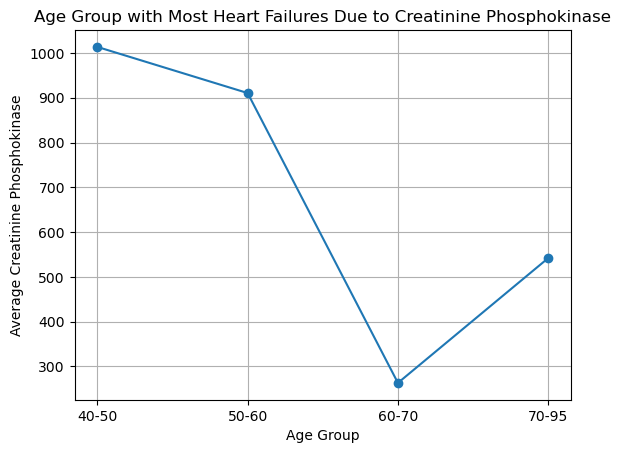

In [119]:
# Categorize age into groups
data['age_group'] = pd.cut(data['age'], bins=[40, 50, 60, 70, 95],
                         labels=['40-50', '50-60', '60-70', '70-95'])

# Filter the dataset for cases with death = 1
df = data[data['death'] == 1]

# Calculate the average creatinine phosphokinase for each age group
df = df.groupby('age_group')['creatinine phosphokinase'].mean().reset_index()

# Create the line plot
plt.plot(df['age_group'], df['creatinine phosphokinase'], marker='o')
plt.title('Age Group with Most Heart Failures Due to Creatinine Phosphokinase')
plt.xlabel('Age Group')
plt.ylabel('Average Creatinine Phosphokinase')
plt.grid(True)
plt.show()